In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [49]:
dfs = [pd.read_csv(f"data/round-1-island-data-bottle/prices_round_1_day_{i}.csv", sep=';') for i in range(-2,1)]

df = pd.DataFrame()
for i in range(len(dfs)):
    dfs[i]['alltime'] = dfs[i]['day'] * 1e6 + dfs[i]['timestamp']
    df = pd.concat([df, dfs[i]], ignore_index=True)

<Axes: title={'center': 'KELP price over time'}, xlabel='alltime'>

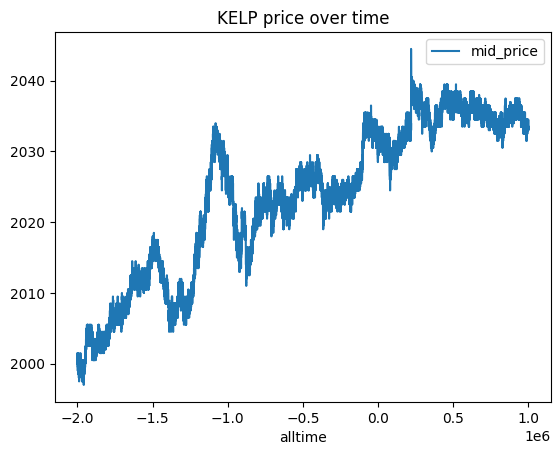

In [50]:
df.loc[df['product']=='KELP'].plot(x='alltime', y='mid_price', title='KELP price over time')

<Axes: title={'center': 'SQUID_INK price over time'}, xlabel='alltime'>

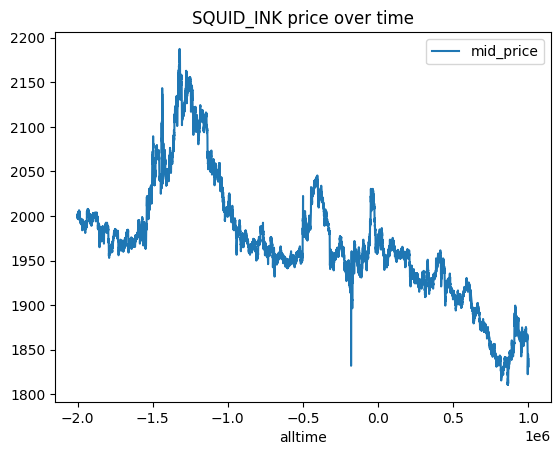

In [51]:
df.loc[df['product']=='SQUID_INK'].plot(x='alltime', y='mid_price', title='SQUID_INK price over time')

/var/folders/zf/qg0wtkdx0x5g8906n_vgw1z40000gn/T/ipykernel_19693/963886136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_df['rowing_avg'] = squid_df['mid_price'].rolling(5).mean()
/var/folders/zf/qg0wtkdx0x5g8906n_vgw1z40000gn/T/ipykernel_19693/963886136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_df['bid_diff'] = squid_df['bid_price_1'] - squid_df['rowing_avg']
/var/folders/zf/qg0wtkdx0x5g8906n_vgw1z40000gn/T/ipykernel_19693/963886136.py:4: SettingWithCopyWarning: 
A value is tryi

<Axes: title={'center': 'SQUID_INK price diff from rolling average'}, xlabel='alltime'>

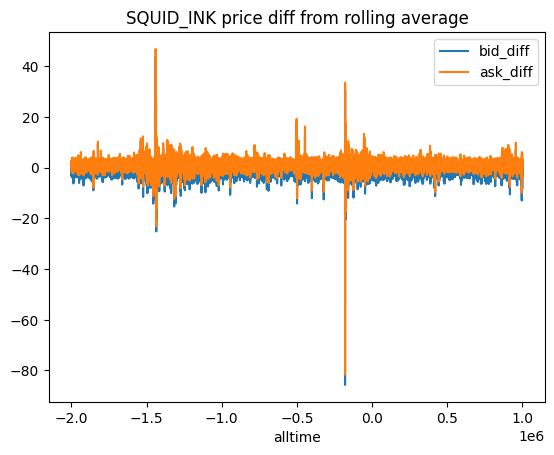

In [52]:
squid_df = df.loc[df['product']=='SQUID_INK']
squid_df['rowing_avg'] = squid_df['mid_price'].rolling(5).mean()
squid_df['bid_diff'] = squid_df['bid_price_1'] - squid_df['rowing_avg']
squid_df['ask_diff'] = squid_df['ask_price_1'] - squid_df['rowing_avg']

squid_df.plot(x='alltime', y=['bid_diff', 'ask_diff'], title='SQUID_INK price diff from rolling average')

KELP reversion details

In [53]:
kelp = df.query('product == "KELP" and day == 0')
kelp.drop(columns=['day', 'alltime'], inplace=True)

/var/folders/zf/qg0wtkdx0x5g8906n_vgw1z40000gn/T/ipykernel_19693/476069296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kelp.drop(columns=['day', 'alltime'], inplace=True)


In [54]:
kelp['mid_1_before'] = kelp['mid_price'].shift(1)

/var/folders/zf/qg0wtkdx0x5g8906n_vgw1z40000gn/T/ipykernel_19693/3889565567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kelp['mid_1_before'] = kelp['mid_price'].shift(1)


np.float64(-0.4890817077788362)

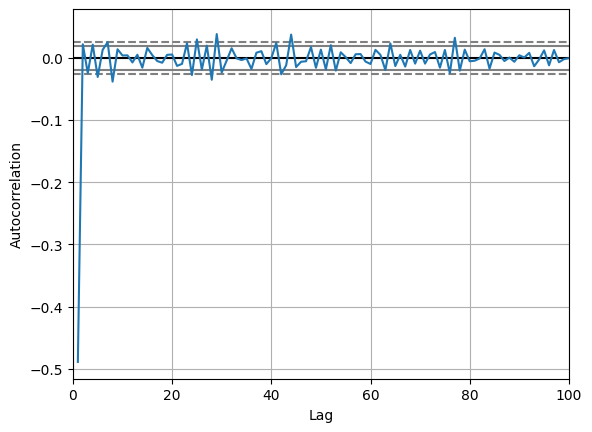

In [55]:
kelp_delta_1 = kelp['mid_price'] - kelp['mid_1_before']
kelp_delta_1_plot = kelp_delta_1.dropna()
fig, ax = plt.subplots()
pd.plotting.autocorrelation_plot(kelp_delta_1_plot, ax) 
ax.set_xlim([0, 100])
kelp_delta_1_plot.autocorr(lag=1)

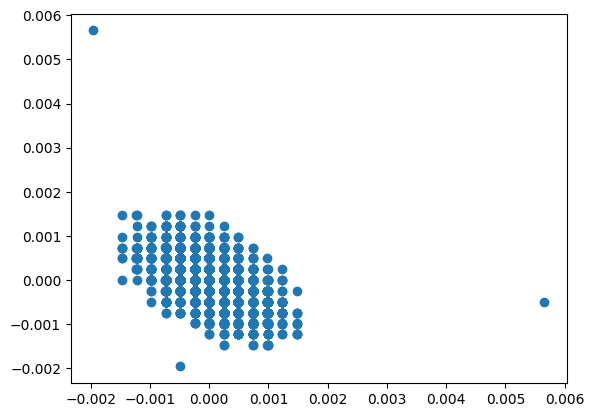

In [56]:
price_change_perc_1_before = kelp_delta_1 / kelp['mid_1_before']
price_change_perc_1_before.dropna(inplace=True)

plt.scatter(price_change_perc_1_before[1:], price_change_perc_1_before[:-1])



(array([4.100e+01, 1.430e+03, 7.030e+03, 1.453e+03, 4.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.00195647, -0.00119516, -0.00043384,  0.00032747,  0.00108878,
         0.0018501 ,  0.00261141,  0.00337272,  0.00413404,  0.00489535,
         0.00565667]),
 <BarContainer object of 10 artists>)

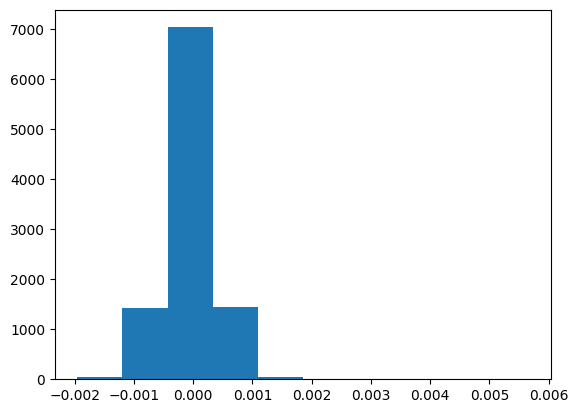

In [57]:
plt.hist(price_change_perc_1_before)

(np.float64(-0.002337125254287384),
 np.float64(0.006037321707117472),
 np.float64(-0.002337125254287384),
 np.float64(0.006037321707117472))

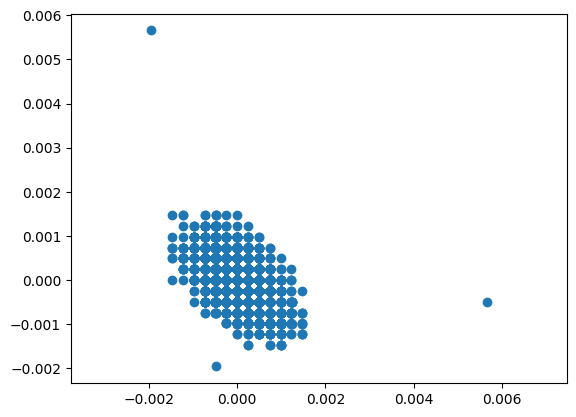

In [58]:
# price_change_perc_1_before.drop(price_change_perc_1_before[price_change_perc_1_before>0.003].index, inplace=True)
# price_change_perc_1_before.drop(price_change_perc_1_before[price_change_perc_1_before<-0.0015].index, inplace=True)
plt.scatter(price_change_perc_1_before[1:], price_change_perc_1_before[:-1])
plt.axis('equal')

In [59]:
lr = statistics.linear_regression(price_change_perc_1_before[1:], price_change_perc_1_before[:-1])
print(lr)
pmcc = statistics.correlation(price_change_perc_1_before[1:], price_change_perc_1_before[:-1])
print(pmcc)


LinearRegression(slope=-0.48909207446521324, intercept=3.1631579142844774e-07)
-0.48906149807821964


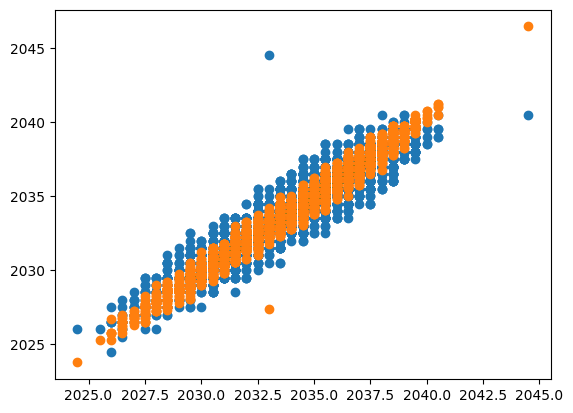

In [60]:
fig, ax = plt.subplots()
ax.scatter(kelp['mid_1_before'], kelp['mid_price'])
ax.scatter(kelp['mid_1_before'], kelp['mid_1_before'] + kelp['mid_1_before'] * (price_change_perc_1_before[:-1]*lr.slope+lr.intercept))

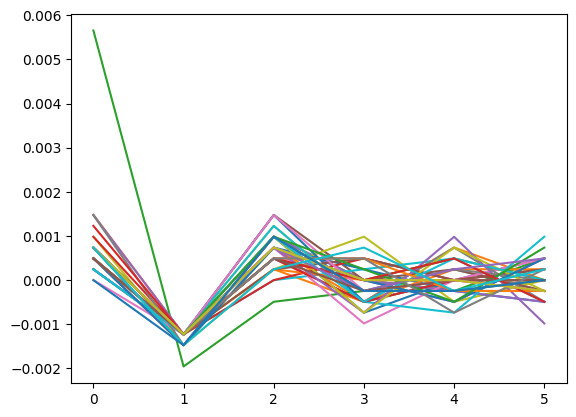

In [63]:
price_change_perc_1_before.reset_index(drop=True, inplace=True)
abrupt_idx = price_change_perc_1_before[price_change_perc_1_before<-0.0012].index

fig, ax = plt.subplots()
for i in abrupt_idx:
    ax.plot(range(6),price_change_perc_1_before[i-1:i+5])